<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 


<a href="http://www.univ-tlse3.fr/" ><img src="http://www.univ-tlse3.fr/medias/photo/ut3pres_logoq_1372757033342.jpg?ID_FICHE=49702" style="float:right; max-width: 250px; display: inline" alt="INSA"/></a> 
</center>

# *[Machine Learning Tutorial](https://github.com/wikistat/MLTraining): IoT and Human Activity Recognition (HAR)*
## Analyse  de signaux  issus d'un *smartphone* 
## Utilisation des librairies <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a> en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> et <a href="https://keras.io/"><img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" style="max-width: 100px; display: inline" alt="Keras"/></a> 


### Résumé
Cas d'usage de [reconnaissance d'activités humaines](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) à partir des enregistrements de signaux (gyroscope, accéléromètre) issus d'un *objet connecté*: un simple smartphone. Les données sont analysées pour illustrer les principales étapes communes en *science des données* et appliquables à des signaux physiques échantillonnés. Visualisation des signaux bruts afin d'évaluer les difficultés posées par ce type de données; exploration ([analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [analyse factorielle discriminante](http://wikistat.fr/pdf/st-m-explo-acp.pdf)) des données transformées (*features*) ou *métier* calculées à partir des signaux; prévision de l'activité à partir des données métier par la plupart des méthodes linéaires dont: [régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf), [SVM](http://wikistat.fr/pdf/st-m-app-svm.pdf) et non linéaires; prévision de l'activité à partir des signaux brutes par [réseau de neurones](http://wikistat.fr/pdf/st-m-app-rn.pdf) élémentaire puis [réseau convolutionnel](http://wikistat.fr/pdf/st-m-app-rn.pdf) (*deep learning*). Ce calepin montre les très bonnes qualités (96%) de prévision des méthodes élémentaires (linéaires) sur les données métier puis, pour économiser les coûteuses (pour la batterie embarquée) transformations, des qualités similaires de prévision  sont obtenues par un réseau convolutionnel sur les signaux bruts.

##  1 Introduction
### 1.1  Objectif général
L'objectif est de reconnaître l'activité d'un individu porteur d'un smartphone qui enregistre un ensemble de signaux issu du gyroscope et de l'accéléromètre embarqués et ainsi connectés. Une base de données d'apprentissage a été construite expérimentalement. Un ensemble de porteurs d'un smartphone ont produit une activité déterminée pendant un laps de temps prédéfini tandis que des signaux étaient enregistrés. Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*). Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  L'analyse des données associée à une identification d'activité en temps réel, ne sont pas abordées.

Les données publiques disponibles ont été acquises, décrites et partièlement analysées par [Anguita et al. (2013)](https://www.icephd.org/sites/default/files/IWAAL2012.pdf). Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine.

L'archive contient les données brutes: accélérations échantillonnnées à 64 htz pendant 2s. Les accélérations en x, y, et z, chacune de 128 colonnes, celles en y soustrayant la gravité naturelle ainsi que les accélérations angulaires (gyroscope) en x, y, et z soit en tout 9 fichiers. Le choix d'une puissance de 2 pour la fréquence d'échantillonnage permet l'exécution efficace d'algorithmes de transformée de Fourier ou en ondelettes.


### 1.2 Déroulement
Une première visualisation et exploration des signaux bruts montre (section 2) que ceux-ci sont difficils à analyser; les classes d'activité y sont en effet mal caractérisées. La principale cause est l'absence de synchronisaiton des débuts d'activité; le déphasage des signaux apparaît alors comme un bruit ou artefact très préjudiciable à la bonne discrimination des activités sur la base d'une dustance euclidienne usuelle ($L_2$). C'est la raison pour laquelle, [Anguita et al. (2013)](https://www.icephd.org/sites/default/files/IWAAL2012.pdf) proposent de calculer un ensemble de transformations ou caractéristiques (*features*) des signaux: variance, corrélations, entropie, décompositions de Fourier... Ce sont alors $p=561$ variables qui sont considérées et explorées dans la section 3. L'[analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf) et surtout l'[analyse factorielle discriminante](http://wikistat.fr/pdf/st-m-explo-acp.pdf) montrent les bonnes qulaités discriminatoires de ces données "métier" issues d'une connaissance experte des signaux. La section 4 exploite ces variables métier et montre que des modèles statistiques élémentaires car linéaires (régression logistique, analyse discriminante) ou qu'un algorithme classique de machine à vecteur support (SVM) utilisant un simple noyau linéaire conduit à d'excellentes prévisions au contraire d'algorihtmes non linaires sophistiqués (*random forest, gradient boosting*).

Néanmoins, faire calculer en permanence des transformations sophistiquées (Fourier) n'est pas une solution viable pour la batterie d'un objet embarqué connecté. L'algorithme candidat doit pouvoir produire une solution intégrable (cablée) dans un cicuit, comme c'est par exemple le cas des puces dédiées à la reconnaissance faciale. C'est l'objet de la section 5: montrer la faisabilité d'une solution basée sur les seuls signaux brutes; solution mettant en oeuvre un réseau de neurones intégrant une [couche convolutionnelle](http://wikistat.fr/pdf/st-m-app-rn.pdf). 

### 1.3 Environnement logiciel
Pour être exécuté, ce calepin (*jupyter notebook*) nécessite l'installation de Python3 via par exemple le site  [Anaconda](https://conda.io/docs/user-guide/install/download.html). Les algorihtmes d'exploration et d'apprentissage statistiques utilisés sont disponibles dans la librairie [`Scikit-learn`](http://scikit-learn.org/stable/) tandis qu'une approche élémentaire de l'apprentissage profond des réseaux de neurones avec couche convolutionnelle nécessite l'installation de la librairie [`Keras`](https://keras.io/) qui entraine celle de [`TensorFlow`](https://www.tensorflow.org/). 

*Remarques*: 
- ce calepin a été construit et testé sous Ubuntu Mate 16.04 (Python 3.6) mais son utilisation sous Windows ou Mac OS ne devrait pas poser de problème une fois l'environnement correctement installé;
- la commande `conda` installe sans difficulté l'environnement `Keras` en incluant `TensorFlow`;
- les réseaux de neurones considérés restent de structure simple, une carte GPU n'est pas indispensable à leur apprentissage sauf si l'utilisateur souhaite approfonfir les optimisations et choix de couches.


# <FONT COLOR="Red">Episode 1</font>

## 2 Etude préalable des signaux bruts
### 2.1 Source

Les données sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Elle doivent être préalablement téléchargées en cliquant [ici](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip).

Chaque enregistrement ou unité statistique ou instance est labellisée avec **6 activités**: debout, assis, couché, marche, monter ou descendre un escalier. Chaque jeu de données est partagé en une partie échantillon d'apprentissage et une partie échantillon test. L'échantillon test n'est utilisé que pour évaluer et comparer les qualités de prévision des principales méthodes. Il est conservé en l'état afin de rendre les comparaisons possibles avec les résultats de la littérature. Il s'agit donc d'un problème de *classification supervisée* (6 classes) avec $n=10299$ échantillons pour l'apprentissage, 2947 pour le test.

Les données contiennent deux jeux de dimensions différentes:

1. Jeu multidimensionel: un individus est constitué de 9 Séries Temporelles de *dimensions* $(n, 128, 9)$
2. Jeu unidimensionnel: Les 9 Séries Temporelles sont concaténées pour constituer un vecteur de 128*9 = 1152 variables de *dimensions* $(n, 1152)$

*N.B.* La structure des données est nettement plus complexe que celles couramment étudiées dans le [dépôt Wikistat](https://github.com/wikistat/). Le code a été structuré en une séquence de fonctions afin d'en faciliter la compréhension. L'outil *calepin* atteint ici des limites pour la réalisation de codes complexes.


### 2.2 Importation des principales librairies.

In [1]:
import pandas as pd
import numpy as np
import copy
import random
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import time

### 2.3 Structurer les données
Définir le chemin d'accès aux données puis les fonctions utiles.

In [7]:
# Attention: le chemin ci-dessous doit être adapté au contexte
DATADIR_UCI = './UCI HAR Dataset'
# Liste des noms des fichiers afin d'automatiser la lecture.
SIGNALS = [ "body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y", "total_acc_z"]

# Fonctions permettant de lire la séquence des fichiers avant de restructurer les données 
# dans le fortmat recherché.
def my_read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

def load_signal(data_dir, subset, signal):
    filename = data_dir+'/'+subset+'/Inertial Signals/'+signal+'_'+subset+'.txt'
    x = my_read_csv(filename).values
    return x 

def load_signals(data_dir, subset, flatten = False):
    signals_data = []
    for signal in SIGNALS:
        signals_data.append(load_signal(data_dir, subset, signal)) 
    if flatten :
        X = np.hstack(signals_data)
    else:
        X = np.transpose(signals_data, (1, 2, 0))    
    return X 

def load_y(data_dir, subset, dummies = False):
    filename = data_dir+'/'+subset+'/y_'+subset+'.txt'
    y = my_read_csv(filename)[0]
    if dummies:
        Y = pd.get_dummies(y).values
    else:
        Y = y.values
    return Y 

Lecture des données

In [8]:
#Multidimensional Data
X_train, X_test = load_signals(DATADIR_UCI, 'train'), load_signals(DATADIR_UCI, 'test')
# Flattened Data
X_train_flatten, X_test_flatten = load_signals(DATADIR_UCI, 'train', flatten=True), load_signals(DATADIR_UCI, 'test', flatten=True)

# Label Y
Y_train_label, Y_test_label = load_y(DATADIR_UCI, 'train', dummies = False), load_y(DATADIR_UCI, 'test', dummies = False)
#Dummies Y (For Keras)
Y_train_dummies, Y_test_dummies = load_y(DATADIR_UCI, 'train', dummies = True), load_y(DATADIR_UCI, 'test', dummies = True)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

Vérification des dimensions afin de s'assurer de la bonne lecture des fichiers.

In [9]:
print("Dimension")
print("Données Multidimensionelles, : " + str(X_train.shape))
print("Données Unimensionelles, : " + str(X_train_flatten.shape))
print("Vecteur réponse (scikit-learn) : " + str(Y_train_label.shape))
print("Matrice réponse(Keras) : " + str(Y_train_dummies.shape))

Dimension
Données Multidimensionelles, : (7352, 128, 9)
Données Unimensionelles, : (7352, 1152)
Vecteur réponse (scikit-learn) : (7352,)
Matrice réponse(Keras) : (7352, 6)


### 2.4 Visualisations
Certre phase est essentielle à la bonne compréhension des données, de leur structure et donc des problèmes qui vont être soulevés par la suite. La visualisation est très élémentaire d'un point de vue méthodologique mais nécessite des compétences plus éléborées en Python et donc des 
#### Fonctions utiles

In [10]:
# Liste des couleurs
CMAP = plt.get_cmap("Accent")
# Liste des types de signaux
SIGNALS = ["body_acc x", "body_acc y", "body_acc z", 
                "body_gyro x", "body_gyro y", "body_gyro z", 
               "total_acc x", "total_acc y", "total_acc z"] 
# Dictionnaire en clair des activités expérimentées (contexte supervisé)
ACTIVITY_DIC = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}
labels = ACTIVITY_DIC.values()

# Fonction pour le tracé d'un signal
def plot_one_axe(X, fig, ax, sample_to_plot, cmap):
    for act,Xgb in X.groupby("Activity"):
        Xgb_first_values = Xgb.values[:sample_to_plot,:-1]
        x = Xgb_first_values[0]
        ax.plot(x, linewidth=1, color=cmap(act-1), label = label_dic[act])
        for x in Xgb_first_values[1:]:
            ax.plot(x, linewidth=1, color=cmap(act-1))
def plot_one_axe_shuffle(X, fig, ax, sample_to_plot, cmap):
    plot_data = []
    for act,Xgb in X.groupby("Activity"):
        Xgb_first_values = Xgb.values[:sample_to_plot,:-1]
        x = Xgb_first_values[0]
        ax.plot(x, linewidth=1, color=cmap(act-1), label = label_dic[act])
        for x in Xgb_first_values[1:]:
            plot_data.append([x,cmap(act-1)])
    random.shuffle(plot_data)
    for x,color in plot_data:
        ax.plot(x, linewidth=1, color=color)

#### Tracés de tous les signaux
Tous les signaux sont tracés par type en superposant les activités.

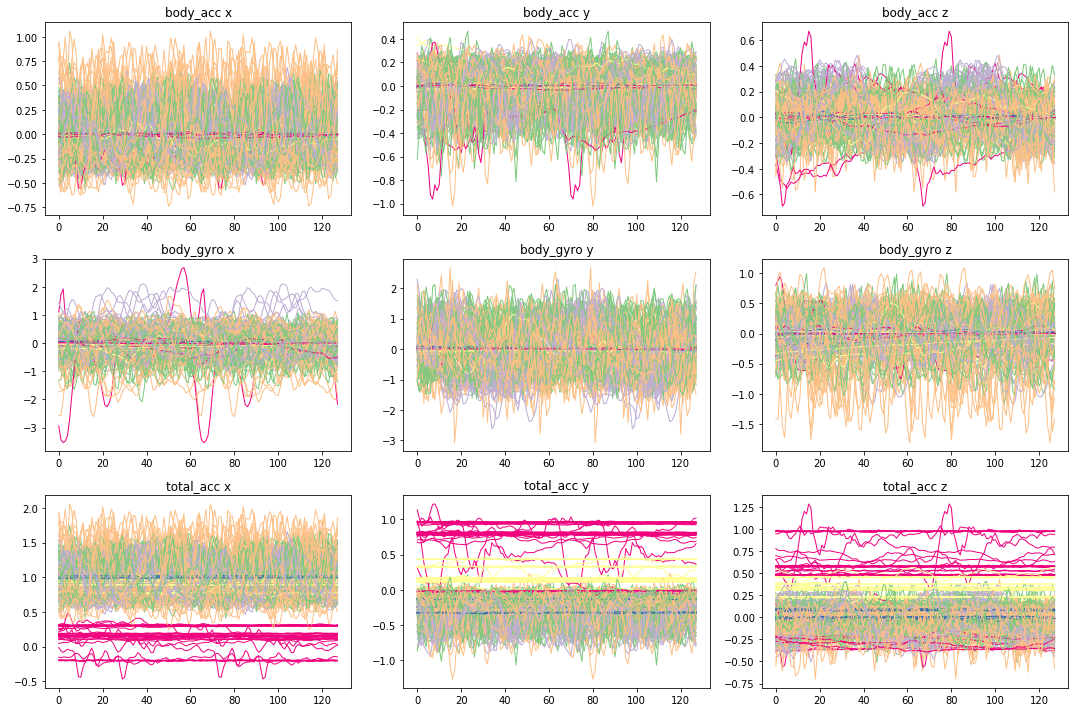

In [11]:
sample_to_plot = 50
index_per_act = [list(zip(np.repeat(act, sample_to_plot), np.where(Y_train_label==act)[0][:sample_to_plot])) for act in range(1,7)]
index_to_plot = list(itertools.chain.from_iterable(index_per_act))
random.shuffle(index_to_plot)

fig = plt.figure(figsize=(15,10))
for isignal in range(9):
    ax = fig.add_subplot(3,3,isignal+1)
    for act , i in index_to_plot:
        ax.plot(range(128), X_train[i,:,isignal],color=CMAP(act-1), linewidth=1)
        ax.set_title(SIGNALS[isignal])
plt.tight_layout()

**Q** Apprécier la difficulté à distinguer les activités au sein d'un même signal.

### 3.3 Par signal 
Le seul signal "acélération en" x est tracé en distinguant les activités.

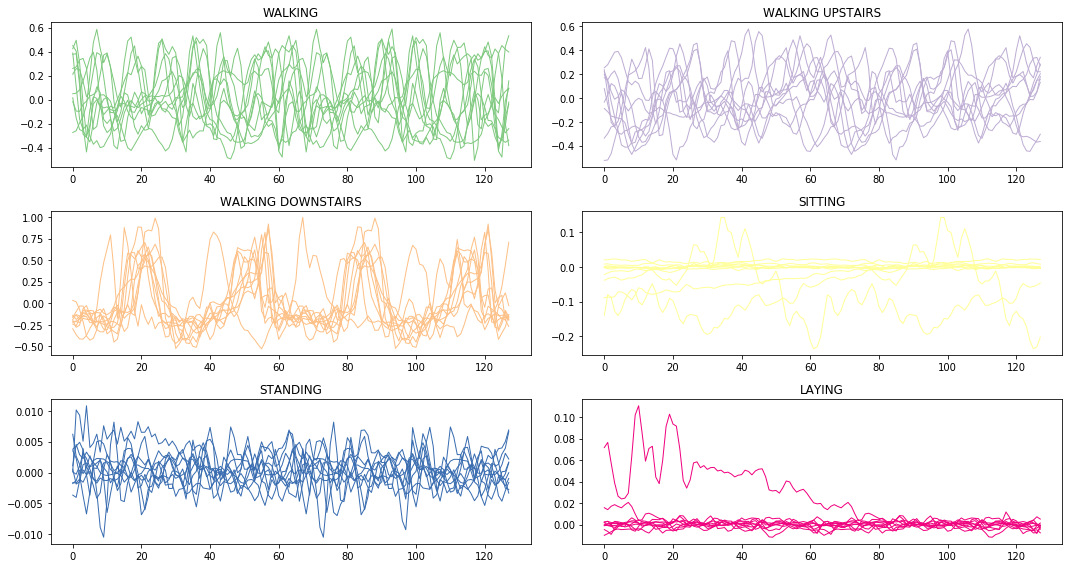

In [12]:
sample_to_plot = 10
isignal = 1
index_per_act_dict = dict([(act, np.where(Y_train_label==act)[0][:sample_to_plot]) for act in range(1,7)])


fig = plt.figure(figsize=(15,8), num=SIGNALS[isignal])
for act , index in index_per_act_dict.items():
    ax = fig.add_subplot(3,2,act)
    for x in X_train[index]:
        ax.plot(range(128), x[:,0],color=CMAP(act-1), linewidth=1)
    ax.set_title(ACTIVITY_DIC[act])
plt.tight_layout()

**Q** Quelles est l'activité qui semble se distinguer facilement des autres? 

**Q** Observer les signaux d'une activité, par exemple `Walking upstairs`. Qu'est ce qui fait que, pour ces signaux ou courbes, une métrique euclidienne classique ($L_2$) est inopérante? 

**Q** Corrélativement pourquoi est-il important de décomposer un signal dans le domaine des fréquences?


### 3.4 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
Il est important de se faire une idée précise de la structure des données.  Une analyse en composantes principales est adaptée à cet objectif. 
#### Remarques
   - L'ACP n'est pas réduite sur ces données car cette transformation est sans effet sur la piètre qualité des graphiques.
   - L'ACP basée sur une métrique euclidienne usuelle ne fait que confirmer les difficultés précedemment identifiées et l'absence de pouvaoir discriminant des données brutes au sens de cette métrique; cette exploration n'est pas approfondies sur ces données. En revanche un autre [calepin](https://github.com/wikistat/Exploration/blob/master/HumanActivityRecognition/Explo-Python-Har-brutes.ipynb) détaille une analyse factorielle discriminante mais avec la même conclusion.


La fonction définie ci-après affiche un nuage de points dans un plan factoriel.

In [13]:
def plot_pca(X_R, ytrain, fig, ax, nbc, nbc2, label_dic=ACTIVITY_DIC, cmaps = plt.get_cmap("Accent")
):
    for i in range(6):
        xs = X_R[ytrain==i+1,nbc-1]
        ys = X_R[ytrain==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=10, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=15)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=15)

#### ACP sur un type de signal

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
# Choix du signal
isignal = 4
signal = SIGNALS[isignal]
print("ACP Sur signal : " +signal)
X_c = pca.fit_transform(X_train[:,:,isignal])

ACP Sur signal : body_gyro y


Représentation des parts de variances.

Text(0.5, 0.98, 'Résultat ACP sur Signal : body_gyro y')

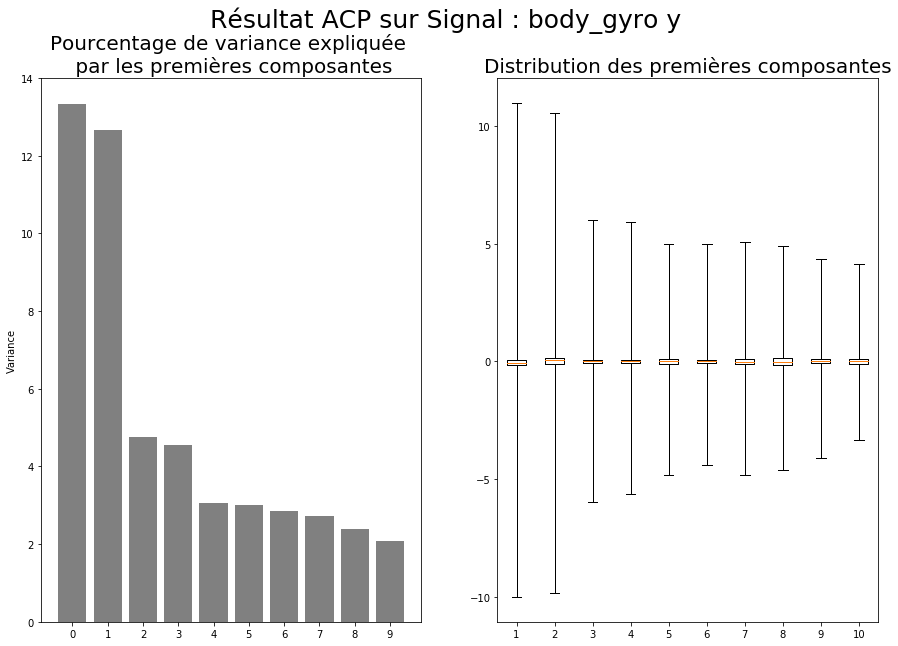

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), pca.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("", fontsize=35)
ax.set_title(u"Pourcentage de variance expliquée \n par les premières composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_c[:,0:10],whis=100)
ax.set_title(u"Distribution des premières composantes", fontsize=20)

fig.suptitle(u"Résultat ACP sur Signal : " + signal, fontsize=25)

**Attention**: les diagrammes boîtes sont très perturbés pas les distributions des composantes avec une très forte concentration autour de 0 et énormément de valeurs atypiques. D'où l'utilisation du paramètre `whis=100` pour rallonger les moustaches.

**Q** Que sont les graphes ci-dessus. Quelles interprétations ou absence d'interprétation en tirer?

Représentation du premier plan factoriel;

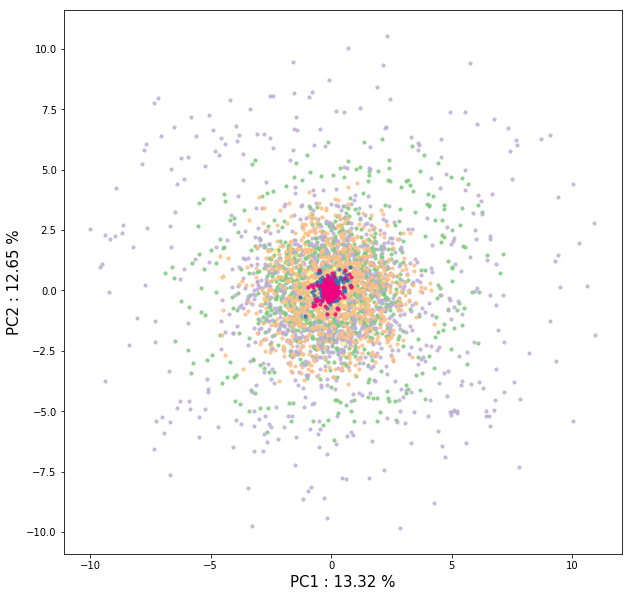

In [16]:
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
plot_pca(X_c, Y_train_label,fig ,ax ,1 ,2)

Les autres plans factoriels ne sont guère plus informatifs.
#### Sur tous les signaux
Tous les signaux sont concaténés à plat en un seul signal.

In [17]:
pca = PCA()
print("ACP Sur tous les signaux")
X_c = pca.fit_transform(X_train_flatten)

ACP Sur tous les signaux


Text(0.5, 0.98, 'Résultat ACP')

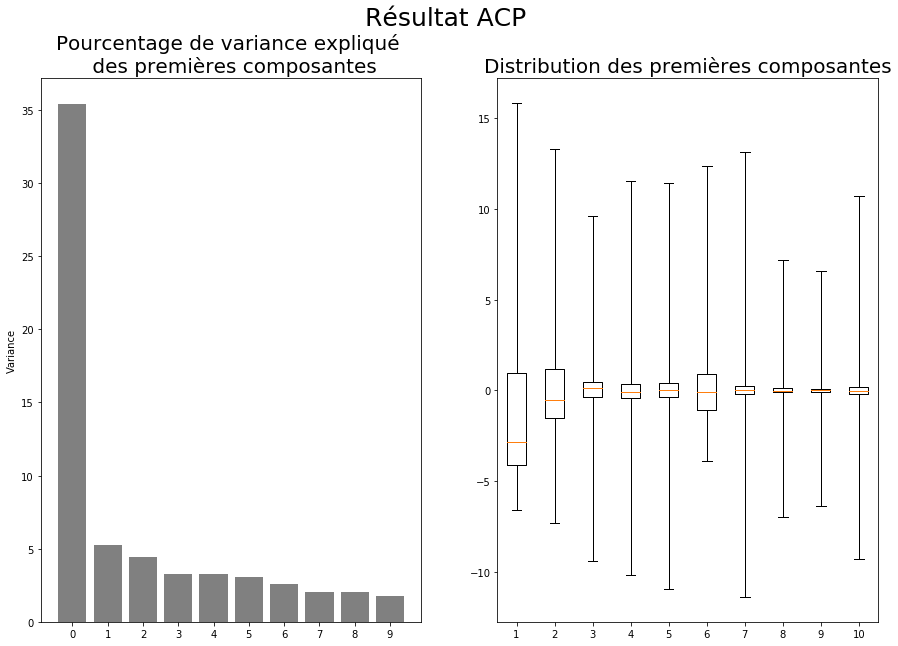

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,2,1)
ax.bar(range(10), pca.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
ax.set_xticks(range(10))
ax.set_ylabel("Variance")
ax.set_title("", fontsize=35)
ax.set_title(u"Pourcentage de variance expliqué \n des premières composantes", fontsize=20)

ax = fig.add_subplot(1,2,2)
box=ax.boxplot(X_c[:,0:10],whis=100)
ax.set_title(u"Distribution des premières composantes", fontsize=20)

fig.suptitle(u"Résultat ACP", fontsize=25)

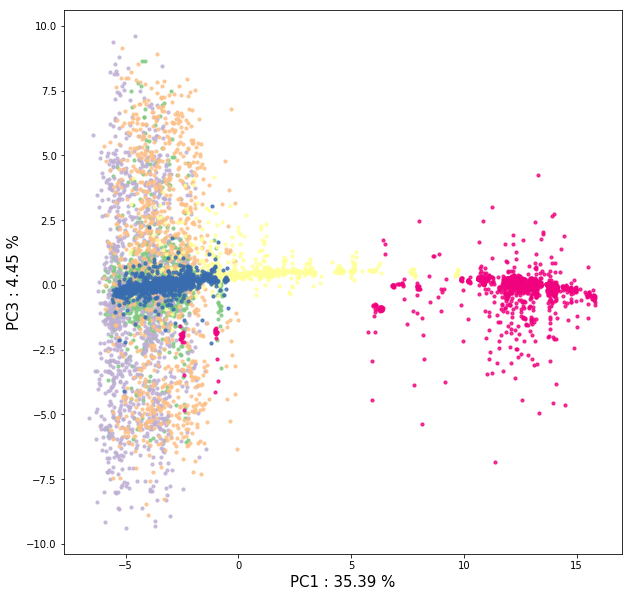

In [19]:
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
plot_pca(X_c, Y_train_label,fig ,ax ,1 ,3)

**Q** Quelle activité semble néanmoins facile à identifier.

## 3 Exploration des données métier
### 3.1 Les données
L'[archive de l'UCI]() contient également deux fichiers `train` et `test` des 561 caractéristiques (*features*) ou variables "métier" calculées dans les domaines temporels et fréquentiels par transformation des signaux bruts.

Voici une liste indicative des variables calculées sur chacun des signaux bruts ou couples de signaux:

Name|Signification
-|-
mean | Mean value
std | Standard deviation
mad | Median absolute value
max | Largest values in array
min | Smallest value in array
sma | Signal magnitude area
energy | Average sum of the squares
iqr | Interquartile range
entropy | Signal Entropy
arCoeff | Autorregresion coefficients
correlation | Correlation coefficient
maxFreqInd | Largest frequency component
meanFreq | Frequency signal weighted average
skewness | Frequency signal Skewness
kurtosis | Frequency signal Kurtosis
energyBand | Energy of a frequency interval
angle | Angle between two vectors

#### Lecture des données métier
Moins volumineuses, elles ont été chargées dans le dépôt simultanément à ce calepin.

In [21]:
# Lecture des données d'apprentissage
# Attention, il peut y avoir plusieurs espaces comme séparateur dans le fichier
Xtrain=pd.read_csv("X_train.txt",sep='\s+',header=None)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [23]:
# Variable cible
ytrain=pd.read_csv("y_train.txt",sep='\s+',header=None,names=('y'))
# Le type dataFrame est inutile et même gênant pour les la suite
ytrain=ytrain["y"]

In [24]:
# Lecture des données de test
Xtest=pd.read_csv("X_test.txt",sep='\s+',header=None)
Xtest.shape
ytest=pd.read_csv("y_test.txt",sep='\s+',header=None,names=('y'))
ytest=ytest["y"]

### 3.2 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
Fonction graphique pour les plans factoriels.

In [25]:
def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(6):
        xs = X_R[ytrain==i+1,nbc-1]
        ys = X_R[ytrain==i+1, nbc2-1]
        label = ACTIVITY_DIC [i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

Calcul de la matrice des composantes principales. C'est aussi un changement (transformation) de base; de la base canonique dans la base des vecteurs propres. 

In [26]:
pca = PCA()
X_c = pca.fit_transform(Xtrain)

#### Valeurs propres ou variances des composantes principales
Représentation de la décroissance des valeurs propres, les variances des variables ou composantes principales.

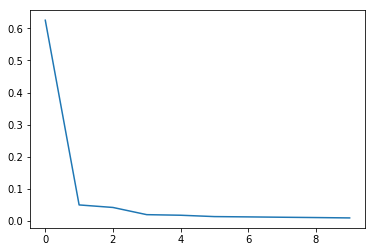

In [27]:
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

Un graphique plus explicite décrit les distribution de ces composantes par des diagrames boîtes; seules les premières sont affichées. 

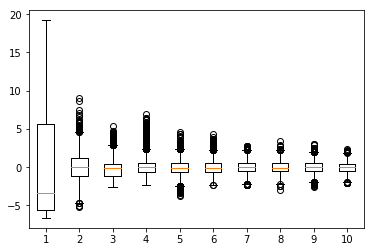

In [28]:
plt.boxplot(X_c[:,0:10])
plt.show()

Commenter la décroissance des variances, le choix éventuel d'une dimension ou nombre de composantes à retenir sur les 561.
#### Représentation des individus ou "activités" en ACP
Projection dans les principaux plans factoriels.

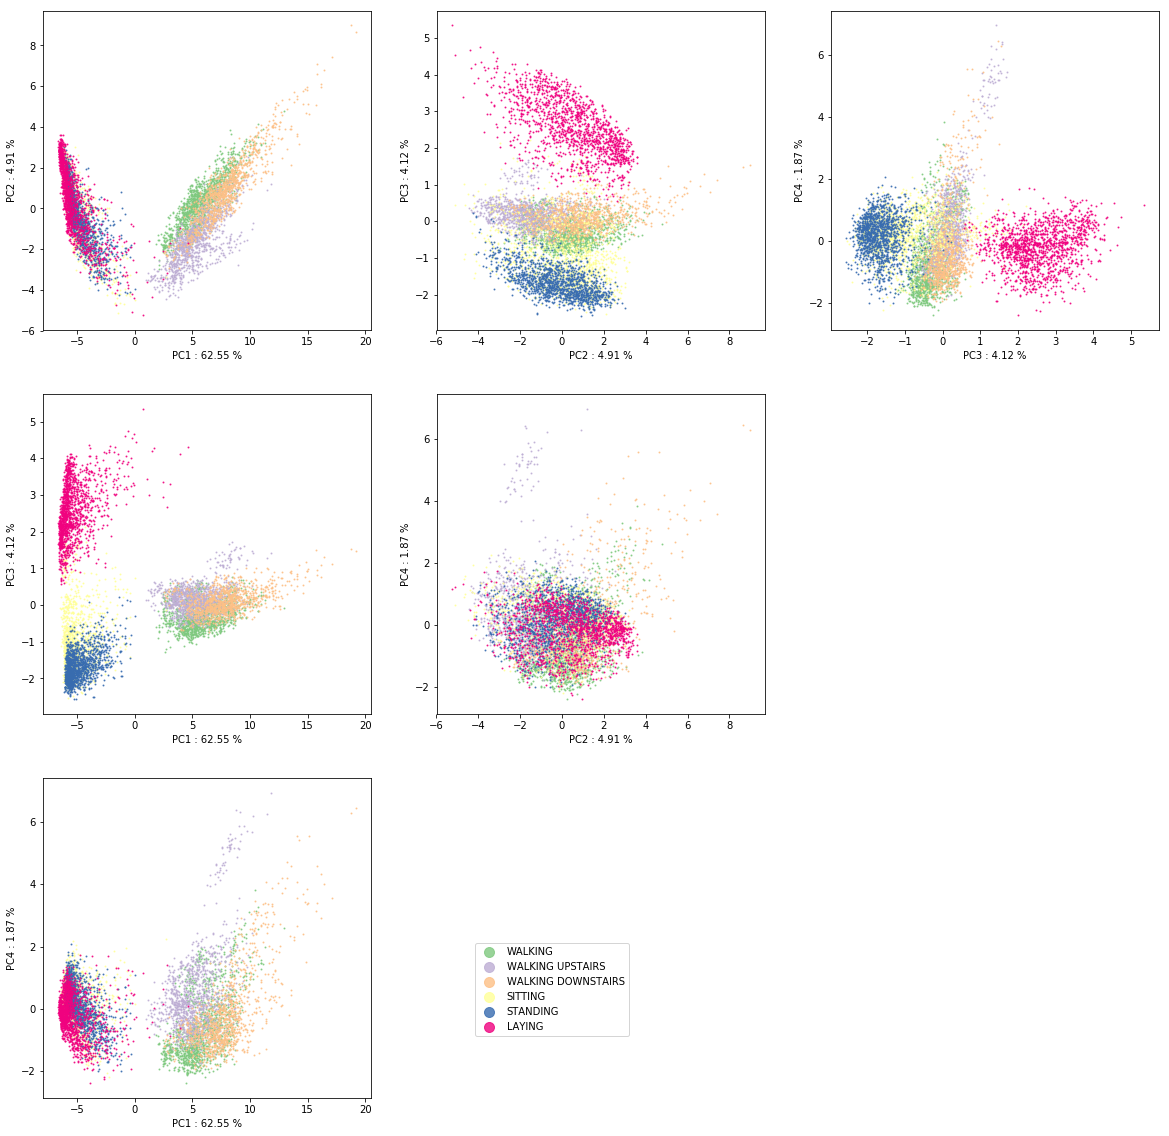

In [29]:
cmaps = plt.get_cmap("Accent")
fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_c, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

**Q** Commenter la séparation des deux types de situation par le premier axe.

**Q** Que dire sur la forme des nuages?

**Q** Que dire sur la plus ou moins bonne séparation des classes?
#### Représentation des variables en ACP
Lecture des libellés des variables et constitution d'une liste. Souci de la grande dimension (561), les représentations ne sont guère exploitables. 

In [30]:
with open('features.txt', 'r') as content_file:
    featuresNames = content_file.read()
columnsNames = list(map(lambda x : x.split(" ")[1],featuresNames.split("\n")[:-1]))

Graphe des variables illisible en mettant les libellés en clair. Seule une * est représentée.

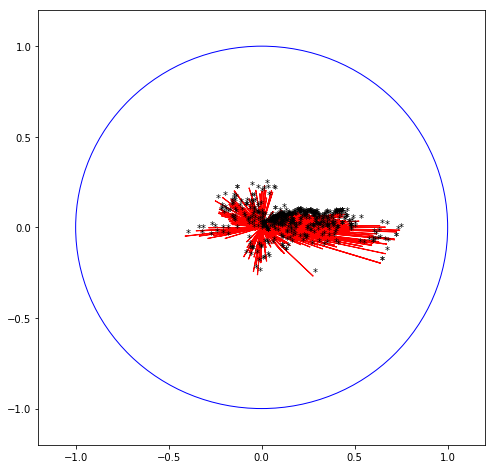

In [31]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j in zip(coord1,coord2, ):
    plt.text(i, j, "*")
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

Identification des variables participant le plus au premier axe. Ce n'est pas plus clair! Seule la réprésentation des individus apporte finalement des éléments de compréhension.

In [32]:
print(np.array(columnsNames)[abs(coord1)>.6])

['tBodyAccJerk-entropy()-X' 'tBodyAccJerk-entropy()-Y'
 'tBodyAccMag-entropy()' 'tGravityAccMag-entropy()'
 'tBodyAccJerkMag-entropy()' 'tBodyGyroJerkMag-entropy()'
 'fBodyAcc-entropy()-X' 'fBodyAcc-entropy()-Y' 'fBodyAcc-entropy()-Z'
 'fBodyAccJerk-entropy()-X' 'fBodyAccJerk-entropy()-Y'
 'fBodyAccJerk-entropy()-Z' 'fBodyAccMag-entropy()'
 'fBodyBodyAccJerkMag-entropy()' 'fBodyBodyGyroJerkMag-entropy()']


### 3.3 [Analyse Factorielle Discriminante (AFD)](http://wikistat.fr/pdf/st-m-explo-afd.pdf)
#### Principe
L'ACP ne prend pas en compte la présence de la variable qualitative à modéliser contrairement à l'analyse factorielle discriminante (AFD) adaptés à ce contexte "supervisé" puisque l'activité est connue sur un échantillon d'apprentissage. L'AFD est une ACP des barycentres des classes munissant l'espace des individus d'une métrique spécifique dite de *Mahalanobis*. Métrique définie par l'inverse de la matrice de covariance intraclase. L'objectif est alors de visualiser les capacités des variables à discriminer les classes.

La librairie `scikit-learn` ne propose pas de fonction spécifique d'analyse factorielle discriminante mais les coordonnées des individus dans la base des vecteurs discriminants sont obtenues comme résultats de l'analyse discriminante linéaire décisionnnelle. Cette dernière sera utilisé avec une finalité prédictive dans un deuxième temps (autre calepin). 

Les résultats de la fonction `LinearDiscriminantAnalysis` de `scikit-learn` sont identiques à ceux de la fonction `lda` de R. Elle eest donc utilisée strictement de la même façon.

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis() 
lda=method.fit(Xtrain,ytrain)
X_r2=lda.transform(Xtrain)

/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**Q** Que signifie le *warning*? Quel traitement faudrait-t-il mettre en oeuvre pour utiliser une analyse discriminante décisionnelle en modélisation ou apprentissage.

#### Représentation des individus en AFD


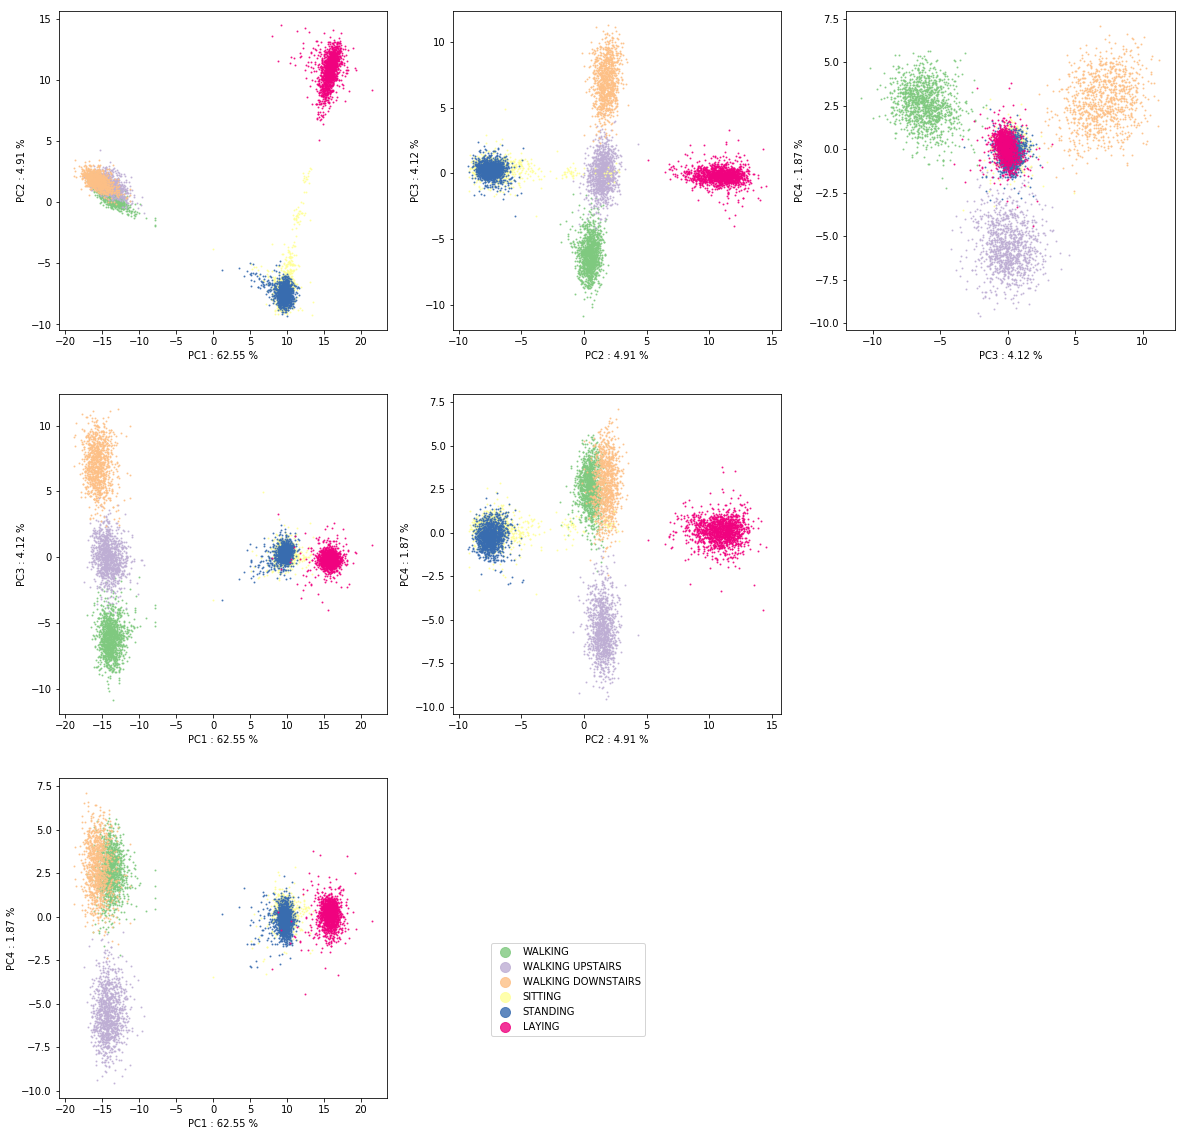

In [34]:
fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r2, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=10)
plt.show()

**Q** Que dire de la séparation des classes. Sont-elles toutes séparables deux à deux?

**Q** Que dire de la forme des nuages notamment dans le premier plan?

Comme pour l'ACP, la représentation trop complexe des variables n'apporterait rien.

### 3.4 [Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
Cette section n'est pas utile puisque les classes sont connues néanmoins, une approche générale des l'étude de signaux relatant des activités humaines non identifiées *a priori* nécessiterait cette phase de classificatyion non supervisée ou *clustering*. Cette étape permet simplementici  d'illusrer le comportement d'un alorithmes classification non supervisée classique. La matrice de confusion les classes obtenues avec celles connues permet d'en évaluer les performances. 
#### $k$*-means*
Attention, il est nécessaire de centrer et réduire les variables avant d'exécuter un algorithme de classification non supervisé.

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
tps1 = time.perf_counter()
X = StandardScaler().fit_transform(Xtrain)
km=KMeans(n_clusters=6, n_jobs=1)
km.fit(Xtrain)
tps2 = time.perf_counter()
print("Temps execution Kmeans :", (tps2 - tps1))

Temps execution Kmeans : 3.304721892985981


In [37]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(ytrain, km.labels_)[1:7,0:6], columns=labels)

,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
0,0,591,0,0,550,85
1,0,807,0,0,217,49
2,0,134,0,0,625,227
3,304,1,49,932,0,0
4,412,0,0,962,0,0
5,164,10,1233,0,0,0


**Q** Que dire de l'efficacité d'une approche non supervisée pour catégoriser les activités?

# <FONT COLOR="Red">Episode 2</font>

## 4 Prévision de l'activité à partir des variables métier
D'autres méthodes sont successivement testées dans les calepins complétant l'étude: SVM, analyse discriminate décisionnelle, $k$ plus proches voisins, forêts aléatoires, réseaux de neurones... Seule la régression logistique est utilisée dans ce calepin pour illustrer la phase d'apprentissage / modélisation pour la prévision du comportement.

### 4.1 [Régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)

####  Principe
Une méthode statistique ancienne mais finalement efficace sur ces données. La régression logistique est adaptée à la prévision d'une variable binaire. Dans le cas multiclasse, la fonction logistique de la librairie `Scikit-learn` estime *par défaut* **un modèle par classe**: une classe contre les autres. 

La probabilité d'appartenance d'un individu à une classe est modélisée à l'aide d'une combinaison linéaire des variables explicatives. Pour transformer une combinaison linéaire à valeur dans $R$ en une probabilité à valeurs dans l'intervalle $[0, 1]$, une fonction de forme sigmoïdale est appliquée.  Ceci donne: $$P(y_i=1)=\frac{e^{Xb}}{1+e^{Xb}}$$ ou, c'est équivalent, une décomposition linéaire du *logit* ou *log odd ratio* de  $P(y_i=1)$:  $$\log\frac{P(y_i=1)}{1-P(y_i=1)}=Xb.$$


####  Estimation du modèle sans optimisation
Le modèle est estimé sans chercher à raffiner les valeurs de certains paramètres (pénalisation). Ce sera fait dans un deuxième temps.

In [39]:
from sklearn.linear_model import LogisticRegression
ts = time.time()
method = LogisticRegression(solver='lbfgs',multi_class='auto')
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()

/home-local/pbesse/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Prévision de l'activité de l'échantillon test
Une fois le modèle estimé, l'erreur de prévision est évaluée, sans biais optimiste, sur un autre échantillon, dit échantillon test, qui n'a pas participé à l'apprentissage du modèle.

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.957923, time running : 1 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,492,1,3,0,0,0
WALKING UPSTAIRS,24,445,2,0,0,0
WALKING DOWNSTAIRS,4,14,402,0,0,0
SITTING,0,3,0,431,57,0
STANDING,0,0,0,16,516,0
LAYING,0,0,0,0,0,537


**Q** Quelles sont les classes qui restent difficiles à discriminer?

**Q** Commenter la qualité des résultats obtenus. Sont-ils cohérents avec l'approche exploratoire.

#### Optimisation du modèle par pénalisation Lasso
*Attention* l'exécution est un peu longue... cette optimisation peut être sautée en première lecture.

In [32]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
from sklearn.model_selection import GridSearchCV
ts = time.time()
param=[{"C":[0.5,1,5,10,12,15,30]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(Xtrain, ytrain)  
# paramètre optimal
logitOpt.best_params_["C"]
te = time.time()
print("Temps : %d secondes" %(te-ts))

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Temps : 376 secondes


In [33]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.953346, Meilleur paramètre = {'C': 5}


In [34]:
yChap = logitOpt.predict(Xtest)
# matrice de confusion
logitOpt.score(Xtest, ytest)

0.9640312181879878

In [35]:
pd.DataFrame(confusion_matrix(ytest, yChap), index = labels, columns=labels)

,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,491,3,2,0,0,0
WALKING UPSTAIRS,19,452,0,0,0,0
WALKING DOWNSTAIRS,3,4,413,0,0,0
SITTING,0,4,0,430,57,0
STANDING,2,0,0,12,518,0
LAYING,0,0,0,0,0,537


**Q** L'amélioration est-elle bien significative au regard du temps de calcul?

### 4.2 [Analyse discriminante linéaire](http://wikistat.fr/pdf/st-m-app-add.pdf)
**Q** Que dire de l'optimisation de cette métode? Celle-ci est proposée dans une librairie de R mais pas disponible en python.

**Q** L'analyse discriminante quadratique pose quelques soucis. Pourquoi?

**Q** Quel paramètre de cet algortithme pourrait être optimisé?

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
ts = time.time()
method = LinearDiscriminantAnalysis()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
score

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9623345775364778

In [37]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.962335, time running : 0 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,490,6,0,0,0,0
WALKING UPSTAIRS,11,460,0,0,0,0
WALKING DOWNSTAIRS,1,14,405,0,0,0
SITTING,0,1,0,434,56,0
STANDING,0,0,0,22,510,0
LAYING,0,0,0,0,0,537


### 4.3 [*K* plus proches voisins](http://wikistat.fr/pdf/st-m-app-add.pdf)

Cette méthode peut être vue comme un cas particulier d'analyse discriminante avec une estimation locale des fonctions de densité conditionnelle. 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
ts = time.time()
method = KNeighborsClassifier(n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [39]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.901595, time running : 10 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,485,2,9,0,0,0
WALKING UPSTAIRS,40,424,7,0,0,0
WALKING DOWNSTAIRS,45,45,330,0,0,0
SITTING,0,3,0,389,99,0
STANDING,0,0,0,37,495,0
LAYING,0,0,0,2,1,534


### 4.4 [SVM linéaire](http://wikistat.fr/pdf/st-m-app-svm.pdf)

**Q** Est-il utile d'optimiser le paramètre de pénalisation dans le cas linéaire? Pourquoi?

In [40]:
from sklearn.svm import LinearSVC
ts = time.time()
method = LinearSVC()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.966746, time running : 3 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,496,0,0,0,0,0
WALKING UPSTAIRS,17,454,0,0,0,0
WALKING DOWNSTAIRS,2,6,412,0,0,0
SITTING,0,3,0,429,57,2
STANDING,1,0,0,10,521,0
LAYING,0,0,0,0,0,537


### 4.5 [SVM avec noyau gaussien](http://wikistat.fr/pdf/st-m-app-svm.pdf)

Apprentissage avec les valeurs par défaut puis optimisation des paramètres.

**Q** Quels sont les paramètres à optimiser?

In [42]:
from sklearn.svm import SVC
ts = time.time()
method = SVC()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()

/home-local/pbesse/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.940278, time running : 21 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,492,0,4,0,0,0
WALKING UPSTAIRS,17,452,2,0,0,0
WALKING DOWNSTAIRS,13,29,378,0,0,0
SITTING,0,2,0,424,65,0
STANDING,0,0,0,44,488,0
LAYING,0,0,0,0,0,537


**Q** Quelle procédure est exécutée ci-après et dans quel but?

*Attention*: l'exécution est un peu longue et peut être sautée en preière lecture.

In [44]:
ts = time.time()
param=[{"C":[4,5,6],"gamma":[.01,.02,.03]}]
svm= GridSearchCV(SVC(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xtrain, ytrain)
te = time.time()
te-ts

416.1660602092743

In [45]:
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.957427, Meilleur paramètre = {'C': 5, 'gamma': 0.02}


**Q** Comparer les deux approches par SVM (linéaire et radiale): temps de calcul et performance.

### 4.6 [*Random forest*](http://wikistat.fr/pdf/st-m-app-agreg.pdf)

**Q** Quel serait le paramètre à optimiser?

In [46]:
from sklearn.ensemble import RandomForestClassifier
ts = time.time()
method = RandomForestClassifier(n_estimators=200,n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [47]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.924330, time running : 8 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,480,7,9,0,0,0
WALKING UPSTAIRS,35,430,6,0,0,0
WALKING DOWNSTAIRS,21,46,353,0,0,0
SITTING,0,0,0,438,53,0
STANDING,0,0,0,46,486,0
LAYING,0,0,0,0,0,537


### 4.7 [*Gradient boosting*](http://wikistat.fr/pdf/st-m-app-agreg.pdf)
**Q** Quels seraient les paramètres à optimiser?

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
ts = time.time()
method = GradientBoostingClassifier()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [49]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = labels, columns=labels)

Score : 0.937224, time running : 157 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,486,5,5,0,0,0
WALKING UPSTAIRS,24,439,7,1,0,0
WALKING DOWNSTAIRS,7,26,387,0,0,0
SITTING,0,2,0,415,74,0
STANDING,0,0,0,34,498,0
LAYING,0,0,0,0,0,537


**Q** Cela vaut-il la peine de chercher à optimiser les paramètres? De tester l'*extrem gradient boosting*?

**Q** Finalement, les méthodes non linéaires sophistiquées sont elles pertinentes sur ces données?

### 4.8 Combinaison de modèles
Les formes des nuages de chaque classe observées dans le premier plan de l'analyse en composantes principales montrent que la structure de covariance n'est pas identique dans chaque classe. Cette remarque suggèrerait de s'intéresser à l'analyse discriminante quadratique mais celle-ci bloque sur l'estimation six matrices de covariance et de leurs inverses. Néanmoins il semble que, plus précisément, deux groupes se distinguent: les classes actives (marcher, monter ou descendre un escalier) d'une part et les classes passives (couché, assis, debout) d'autre part et, qu'à l'intérieur de chaque groupe les variances sont assez similaires. 

Cette situation suggère de construire une décision en deux étapes ou hiérarchique:
    1. Régression logistique séparant les activités passives *vs.* actives,
    2. Un modèle spécifique à chacune des classes précédentes, par exemple des SVM à noyau gaussien.

Une telle construction hiérarchique de modèles aboutit à une précision supérieure à 97%.

**Exo** Programmer une telle approche. en utilisant les capacités de python pour réaliser un *pipeline* .

# <FONT COLOR="Red">Episode 3</font>

## 5 Prévision de l'activité à partir des signaux bruts
### 5.1 Introduction
Comme expliqué en introduction, le calcul des nombreuses transformations des données est bien trop consommateur des resosurces de la batterie d'un objet connecté. Cette section se propose d'utiliser les seules signaux bruts pour faire apprendre un algorithme et parmi ceux-ci seuls les réseaux de neurones pouvant être "cablés" dan sun circuit sont pris en compte. En effet un algorithme de type XGBoost (extrem gradient boosting) parvient agalement à de bons résultats sur les signaux mais à un coût trop élevé. 

Deux algorithmes sont successivement testés: un rseau de type perceptron classique suivi d'un réseau avec couche de convolution 1D sur les signaux. 

Il faudrait ajouter que de nombreuses configurations on été testées, merci aux étudiants de l'INSA de Toulouse de la spécialité Mathématiques Appliquées - Science des Données: LSTM, convolution 2D... avant d'adopter celle proposée ci-dessous. C'est une réalité, de l'apprentissage profond, sans fondement théorique précis, seule une approche très heuristique des innombrables solutions d'empilements possibles de couches, permet de déterminer une configuration  plus performante. D'autres structures de réseau seraient à tester pour atteindre les 96% de la solution précédente.

### 5.2 Perceptron à une couche cachée
#### Librairies 

In [50]:
import keras.models as km 
import keras.layers as kl 
import keras.layers.core as klc

Using TensorFlow backend.


In [51]:
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}
def my_confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

#### Définition du réseau 
Une couche cachée, une couche de reformattage puis une couche de sortie à 6 classes. Le nombre de neurones (50) sur la couche cachée a été optimisé par ailleurs. Le nombre d'epochs reste raisonnable et la taille des batchs devraient être optimisés surtout dans le cas d'utilisation d'une carte GPU.

Remarquer le nombre de paramètres à estimer.

In [52]:
epochs=20
batch_size=32
n_hidden = 50

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 6

model_base_mlp =km.Sequential()
model_base_mlp.add(kl.Dense(n_hidden, input_shape=(timesteps, input_dim),  activation = "relu"))
model_base_mlp.add(kl.Reshape((timesteps*n_hidden,) , input_shape= (timesteps, n_hidden)  ))
model_base_mlp.add(kl.Dense(n_classes, activation='softmax'))

model_base_mlp.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_base_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128, 50)           500       
_________________________________________________________________
reshape_1 (Reshape)          (None, 6400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 38406     
Total params: 38,906
Trainable params: 38,906
Non-trainable params: 0
_________________________________________________________________


In [53]:
t_start = time.time()
model_base_mlp.fit(X_train,  Y_train_dummies, batch_size=batch_size, validation_data=(X_test, Y_test_dummies), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_mlp.evaluate(X_test, Y_test_dummies)[1] 
print("\nScore With Simple MLP on Multidimensional Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )
metadata_mlp = {"time_learning" : t_learning, "score" : score}
base_mlp_prediction = model_base_mlp.predict(X_test)

my_confusion_matrix(Y_test_dummies, base_mlp_prediction)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 2s 269us/step - loss: 0.6107 - acc: 0.7467 - val_loss: 0.7241 - val_acc: 0.7333
Epoch 2/20
7352/7352 [==============================] - 2s 233us/step - loss: 0.3375 - acc: 0.8739 - val_loss: 0.5779 - val_acc: 0.8076
Epoch 3/20
7352/7352 [==============================] - 2s 221us/step - loss: 0.2550 - acc: 0.9070 - val_loss: 0.5896 - val_acc: 0.8185
Epoch 4/20
7352/7352 [==============================] - 2s 238us/step - loss: 0.2075 - acc: 0.9208 - val_loss: 0.5739 - val_acc: 0.8059
Epoch 5/20
7352/7352 [==============================] - 2s 245us/step - loss: 0.1806 - acc: 0.9308 - val_loss: 0.5269 - val_acc: 0.8521
Epoch 6/20
7352/7352 [==============================] - 1s 192us/step - loss: 0.1613 - acc: 0.9370 - val_loss: 0.4669 - val_acc: 0.8537
Epoch 7/20
7352/7352 [==============================] - 2s 231us/step - loss: 0.1417 - acc: 0.9434 - val_loss: 0.5385 - val_acc: 0.8480


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,409,55,2,0,25
STANDING,0,83,388,1,0,60
WALKING,0,0,1,383,78,34
WALKING_DOWNSTAIRS,0,0,1,17,384,18
WALKING_UPSTAIRS,0,0,0,30,18,423


### 5.3 Réseau avec couche convolutionnelle
L'idée pertinente avec ces données est évidemment d'identifier le problème lié au déphasage des signaux. L'utilisation d'une couche convolutionnelle introduit une propriété d'invariance par translation. Les caractéristiques ou *features* sortant de cette couche acquièrent donc ainsi de bonnes propriétés avant d'être dirigées vers des couches techniques intermédiaires (`MaxPooling, Flatten`) et une dernière couche de sortie qui effectue la discrimination à partir des caractéristiques.

Remarquer le nombre de paramètres à estimer, le comparer avec celui du perceptron précédent.

In [54]:
timesteps = len(X_train[0])
batch_size= 32
input_dim = len(X_train[0][0])
n_classes = 6
epochs=20

model_base_conv_1D =km.Sequential()
model_base_conv_1D.add(kl.Conv1D(32, 9, activation='relu', input_shape=(timesteps, input_dim)))
model_base_conv_1D.add(kl.MaxPooling1D(pool_size=3))
model_base_conv_1D.add(kl.Flatten())
model_base_conv_1D.add(kl.Dense(n_classes, activation='softmax'))
model_base_conv_1D.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_base_conv_1D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 120, 32)           2624      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 40, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 7686      
Total params: 10,310
Trainable params: 10,310
Non-trainable params: 0
_________________________________________________________________


In [55]:
t_start = time.time()
model_base_conv_1D.fit(X_train,  Y_train_dummies, batch_size=batch_size, validation_data=(X_test, Y_test_dummies), epochs=epochs)
t_end = time.time()
t_learning = t_end-t_start

score = model_base_conv_1D.evaluate(X_test, Y_test_dummies)[1] 

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 3s 417us/step - loss: 0.5580 - acc: 0.7903 - val_loss: 0.4716 - val_acc: 0.8252
Epoch 2/20
7352/7352 [==============================] - 2s 300us/step - loss: 0.1991 - acc: 0.9340 - val_loss: 0.2919 - val_acc: 0.8938
Epoch 3/20
7352/7352 [==============================] - 3s 346us/step - loss: 0.1349 - acc: 0.9478 - val_loss: 0.2620 - val_acc: 0.9016
Epoch 4/20
7352/7352 [==============================] - 2s 335us/step - loss: 0.1186 - acc: 0.9497 - val_loss: 0.2503 - val_acc: 0.9152
Epoch 5/20
7352/7352 [==============================] - 2s 334us/step - loss: 0.1116 - acc: 0.9540 - val_loss: 0.2959 - val_acc: 0.9060
Epoch 6/20
7352/7352 [==============================] - 2s 299us/step - loss: 0.1083 - acc: 0.9532 - val_loss: 0.2592 - val_acc: 0.9118
Epoch 7/20
7352/7352 [==============================] - 2s 316us/step - loss: 0.1028 - acc: 0.9563 - val_loss: 0.2403 - val_acc: 0.9237


In [56]:
metadata_conv = {"time_learning" : t_learning, "score" : score}
base_conv_1D_prediction = model_base_conv_1D.predict(X_test)
my_confusion_matrix(Y_test_dummies, base_conv_1D_prediction)

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,535,0,0,0,0,2
SITTING,0,445,43,0,0,3
STANDING,0,123,407,0,0,2
WALKING,0,0,1,490,0,5
WALKING_DOWNSTAIRS,0,0,0,4,410,6
WALKING_UPSTAIRS,0,2,0,7,26,436


In [57]:
print("Score With Conv on Multidimensional Inertial Signals = %.2f, Learning time = %.2f secondes" %(score*100, t_learning) )

Score With Conv on Multidimensional Inertial Signals = 92.40, Learning time = 48.15 secondes


Quelques efforts supplémentaires permettraient sans doute de gratter quelques points sur la précision du résultat mais... attention au sur-apprentissage si le même échantillon test est toujours utilisé. Le volume des données est sans doute insuffisant pour atteindre cet objectif ou alors il faudrait tester une "augmentation des données"  en opérant des translations des signaux.

L'objectif final de ce calepin n'est pas de trouver la meilleure solution mais bien de montrer qu'un traitement des signaux bruts avec les algorithmes adaptés conduit finalement à des résultats aussi pertinents que le traitement des données issues de l'expertise de spécialistes du traitement du signal.